# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing <span style="color: red; ">data on various customers' annual spending amounts (reported in *monetary units*)</span> of diverse product categories for internal structure. One goal of this project is to <span style="color: red; ">best describe the variation in the different types of customers that a wholesale distributor interacts with</span>. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01a77c86a0>,
      dtype=object)

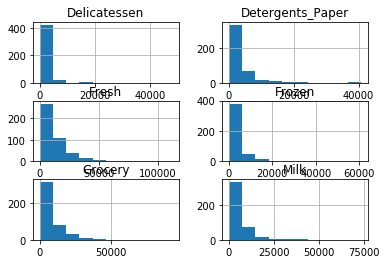

In [3]:
data.hist()

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# Tried several times with this
# indices = [np.random.randint(0,439),np.random.randint(0,439),np.random.randint(0,439)]
# print(indices)
indices = [368, 410, 319]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)
#Used to compare the samples with the ppopulation
#display(data.mean())
#display(samples.describe())

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  22335   1196     2406    2046               101           558
1   6633   2096     4563    1389              1860          1892
2   9759  25071    17645    1128             12408          1625

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


In [5]:
samples.copy().append(data.mean(), ignore_index=True).T.plot()

**Answer:**

From the figure above, following establishments can be the candidates of each customers.

| Customer | Establishments | Reason |
|----------|----------------|--------|
| 0 | Food Manufacturer, factory | Extremely High on Fresh, whil others are lower against the average |
| 1 | Small Merchandise, Small Wholesellers, Markets | Lower than or close to average, while the same portion among categories to the average.|
| 2 | Cafe | Milk, Grocery, and Detergents_Paper are high against the average. Could be an establishment which sells ready to eat food |
| 3 | Average as a reference | NA (Just as a reference) |

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

for entry in data.columns.values:
    predicted_feature = entry

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.copy().drop(predicted_feature, axis = 1)

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data,
                                                        data[predicted_feature],
                                                        test_size = 0.25,
                                                        random_state = 42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)
    #regressor.predict(X_test)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("score to predict {} : {:.04f}".format(entry, score))

score to predict Fresh : -0.3331
score to predict Milk : 0.1734
score to predict Grocery : 0.6992
score to predict Frozen : -0.2782
score to predict Detergents_Paper : 0.3488
score to predict Delicatessen : -11.0236


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

- Which feature did you attempt to predict? => **'Delicatessen'**
- What was the reported prediction score? => **-11.0236**
- Is this feature necessary for identifying customers' spending habits => **No. The score indicates the contribution to the prediction is negative.**

Note: I first picked up 'Delicatessen' as it seems to have least correlation with other features as below.
The R^2 score resulted in score -11.236.
So came to be interested in other scores, and calculated all at last. Grocery marked highest R^2 score.

In [7]:
data.corr()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. <span style="color: red; ">If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others.</span> Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


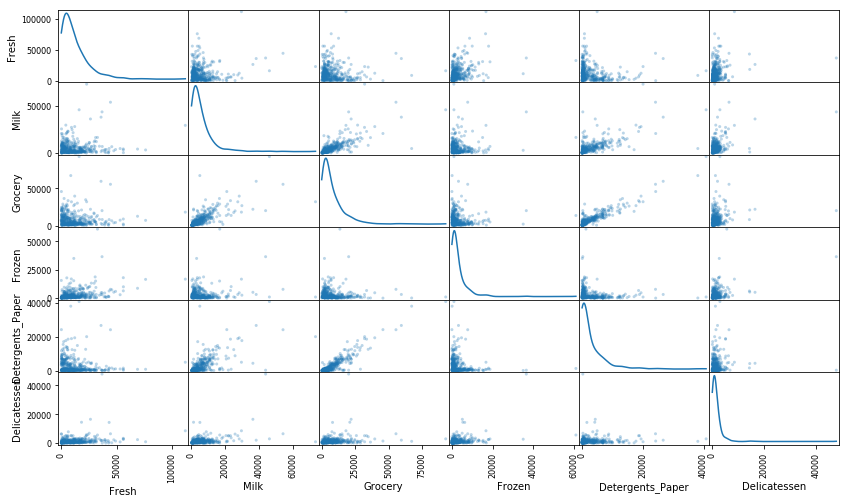

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

In [9]:
data.corr()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000

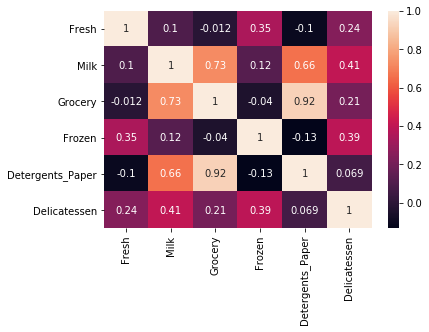

In [10]:
import seaborn
seaborn.heatmap(data.corr(), annot=True)

**Answer:**

- **Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.**
    - In the scatter matrix, the kernel density estimation(KDE) shows there are some peaks, but each features have long tails, except *Delicatessen*.
    - The scatter diagrams show that this diversity 'Milk', 'Grocery', 'Frozen', and 'Detergents_Paper' indicates the sleeves comes from some co-relation with other features.
    - 'Fresh' is not such normal with others but larger diversity. The amount is weakly related to all other feasutres.
    - 'Delicatessen' amount has longest sleeves in the KDE, which means many number of data points near 0 among others. 
    - There are outliers for all the features, while the amount varies with each.
- **Are there any pairs of features which exhibit some degree of correlation?**
    - *Grocery* and *Detergent_Paper" shows strong corelation (0.92).
    - *Grocery* and *Milk" shows strong corelation (0.92).
    - *Milk" and *Detergent_Paper" shows some corelation (0.66).
    - Somw weeker corelation, *Milk" and *Delicatessen*, *Frozen* and *Fresh*
- **Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?**
    - Confirm. Out of my interest, I picked up the feature that seems to have least corelation with others.
- **How is the data for those features distributed**
    - *Delicatessen* has weak relation with other features.
    - *Others are weak, *Detergents_Paper* is almost irrelevant.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


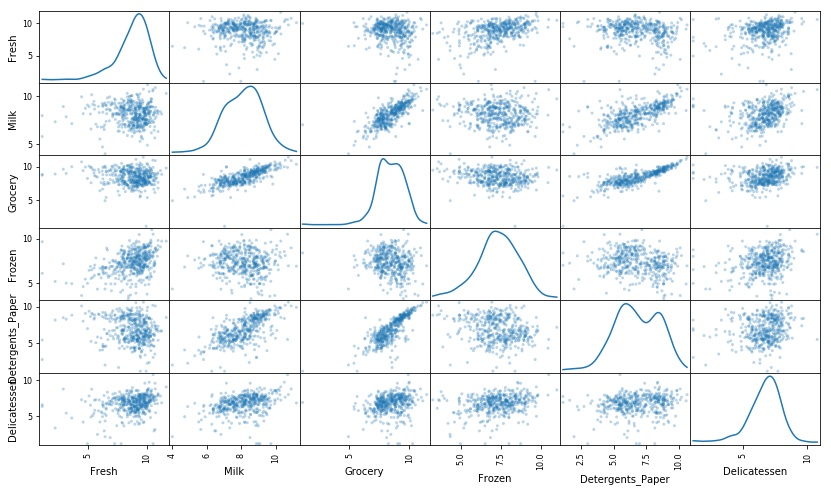

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.013910   7.086738  7.785721  7.623642          4.615121      6.324359
1   8.799812   7.647786  8.425736  7.236339          7.528332      7.545390
2   9.185945  10.129467  9.778208  7.028201          9.426097      7.393263

In [13]:
log_samples.copy().append(log_data.mean(), ignore_index=True).T.plot(sharex=False)

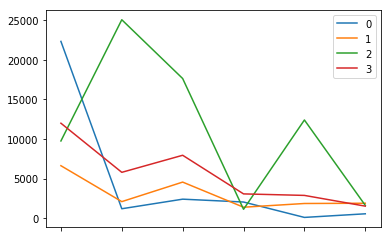

In [14]:
samples.copy().append(data.mean(), ignore_index=True).T.plot()

The *Detergents_Paper* goes lower for the customer 0 against the average(Line 3). Other relations are not changed so much. Still *Milk* and *Grocery* differentiates 2 with other largely with *Detergents_Paper*.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [15]:
# For each feature find the data points with extreme high or low values
outlier_each = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outlier_each[feature] = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier_each[feature])
    
# OPTIONAL: Select the indices for data points you wish to remove
outlier = pd.concat([outlier_each['Fresh'],\
                     outlier_each['Milk'],\
                     outlier_each['Grocery'],\
                     outlier_each['Frozen'],\
                     outlier_each['Detergents_Paper'],\
                     outlier_each['Delicatessen']])

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outlier.index]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

In [16]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


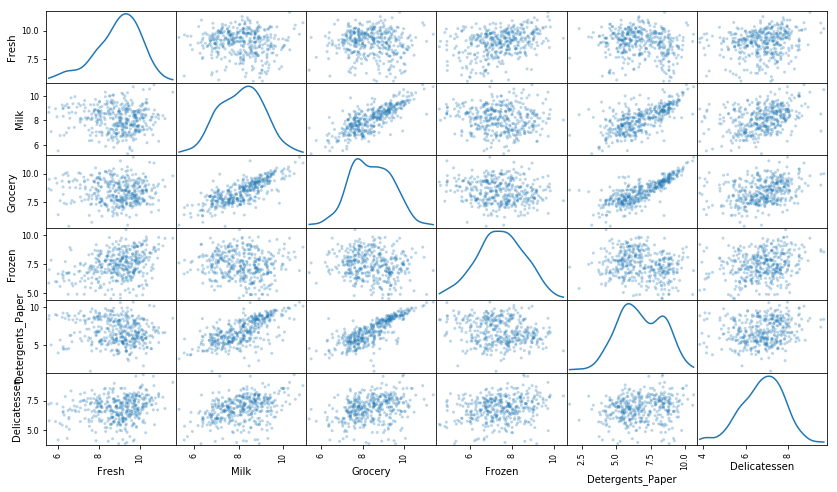

In [17]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

In [18]:
print("Duplicated : {0}".format(outlier[outlier.duplicated()].sort_index().index))
#display(data.iloc[outlier[outlier.duplicated()].index])
#data.iloc[outlier[outlier.duplicated()].index].T.plot()
display(log_data.iloc[outlier[outlier.duplicated()].index])
log_data.iloc[outlier[outlier.duplicated()].index].T.plot()
outliers = outlier.drop_duplicates().index

Duplicated : Int64Index([65, 66, 75, 128, 154, 154], dtype='int64')


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
154  6.432940  4.007333   4.919981  4.317488          1.945910      2.079442
65   4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
75   9.923192  7.036148   1.098612  8.390949          1.098612      6.882437
66   2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
128  4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
154  6.432940  4.007333   4.919981  4.317488          1.945910      2.079442

**Answer:**

* Are there any data points considered outliers for more than one feature based on the definition above? 
    * 65, 66, 75, 128, 154 (154 appears twice as it appears in 3 categories)
* Should these data points be removed from the dataset?
    * No.
    * Seeing the graph above, 65,66,128 shows the same pattern,
        * High in Mil and Grocery, and Detegents_Paper,
        * and low in Freah, Frozen, and Delicatessen.
    * 75 is shows the reverse pattern.
    * They could be some abnormal values, but could represent some establishments.
    * As we don't know what those group repsresents, we should not remove them.
* If any data points were added to the outliers list to be removed, explain why.
    * Nothing so far.

Revert them

In [19]:
good_data.append(log_data.iloc[outlier[outlier.duplicated()].index]).reset_index(drop = True)

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0     9.446913   9.175335   8.930759  5.365976          7.891331      7.198931
1     8.861775   9.191158   9.166179  7.474205          8.099554      7.482119
2     8.756682   9.083416   8.946896  7.785305          8.165079      8.967504
3     9.492884   7.086738   8.347827  8.764678          6.228511      7.488853
4    10.026369   8.596004   8.881558  8.272571          7.482682      8.553525
5     9.149847   9.019059   8.542081  6.501290          7.492760      7.280008
6     9.403107   8.070594   8.850088  6.173786          8.051978      6.300786
7     8.933137   8.508354   9.151227  7.419980          8.108021      7.850104
8     8.693329   8.201934   8.731013  6.052089          7.447751      6.620073
9     8.700514   9.314070   9.845911  7.055313          8.912608      7.648740
10    8.121480   8.594710   9.470703  8.389360          8.695674      7.463937
11    9.483873   7.024649   8.416931  7.258412          6.308098      6.208590
12   10.364514   9.418898   9.372204  5.659482          8.263848      7.983099
13    9.962558   8.733594   9.614605  8.037543          8.810907      6.400257
14   10.112654   9.155356   9.400217  5.683580          8.528726      7.681560
15    9.235326   7.015712   8.248267  5.983936          6.871091      6.021023
16    6.927558   9.084324   9.402695  4.897840          8.413609      6.984716
17    8.678632   8.725345   7.983781  6.732211          5.913503      8.406932
18    9.830971   8.752581   9.220192  7.698483          7.925519      8.064951
19    8.959312   7.822044   9.155250  6.505784          7.831220      6.216606
20    9.772581   8.416046   8.434246  6.971669          7.722678      7.661056
21    8.624612   6.769642   7.605890  8.126518          5.926926      6.343880
22   10.350606   7.558517   8.404920  9.149316          7.775276      8.374246
23   10.180096  10.502956   9.999661  8.547528          8.374938      9.712509
24   10.027783   9.187686   9.531844  7.977625          8.407825      8.661813
25    9.690604   8.349957   8.935245  5.303305          8.294799      4.043051
26    9.200088   6.867974   7.958926  8.055475          5.488938      6.725034
27    9.566335   6.688355   8.021256  6.184149          4.605170      6.249975
28    8.321908   9.927399  10.164197  7.054450          9.059982      8.557567
29   10.671000   7.649693   7.866722  7.090077          7.009409      6.712956
..         ...        ...        ...       ...               ...           ...
374   8.513787   8.488588   8.799812  9.790655          6.815640      7.797702
375   8.694335   7.595890   8.136518  8.644530          7.034388      5.669881
376   8.967249   8.707152   9.053920  7.433075          8.171882      7.535830
377   8.386857   9.300181   9.297252  6.742881          8.814033      6.900731
378   8.530109   8.612322   9.310638  5.897154          8.156223      6.968850
379   6.492240   9.047115   9.832099  4.890349          8.815815      6.654153
380   9.089415   8.238273   7.706613  6.450470          7.365180      7.327123
381   9.744668   8.486115   9.110851  6.938284          8.135933      7.486613
382  10.181119   7.227662   8.336151  6.721426          6.854355      7.104965
383   9.773664   8.212297   8.446127  6.965080          7.497207      6.504288
384   9.739791   7.966933   9.411811  6.773080          8.074960      5.517453
385   9.327501   7.786552   7.860571  9.638740          4.682131      7.542213
386   9.482960   9.142811   9.569133  8.052296          8.532870      7.546446
387  10.342130   9.722385   8.599510  9.621257          6.084499      7.058758
388   8.021913   8.694502   8.499029  7.695303          6.745236      5.758902
389   8.038189   8.349957   9.710085  6.354370          5.484797      7.640123
390   9.051696   8.613594   8.548692  9.509407          7.227662      7.311886
391   9.957834   7.057898   8.466742  5.594711          7.191429      5.978886
392   7.591862   8.076515   7.308543  7.340187          5.8

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

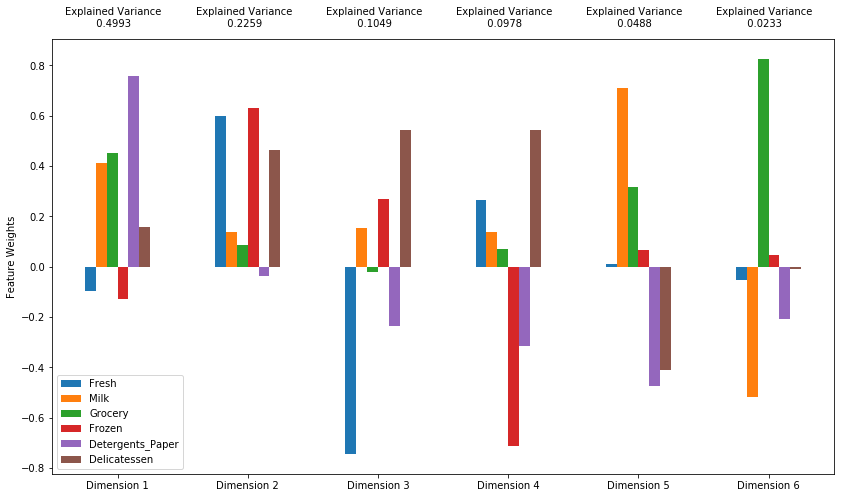

In [20]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# if we set n_components=0.97, the dimensions can be descreased.
# To keep the dimensions for the time, set n_components = 0.98
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [21]:
pca.get_covariance()

array([[ 1.24570224, -0.07278378, -0.06444924,  0.42944168, -0.26292101,
         0.22046778],
       [-0.07278378,  1.015563  ,  0.79546345, -0.08452244,  1.09096268,
         0.40027025],
       [-0.06444924,  0.79546345,  1.02375809, -0.16681847,  1.29310572,
         0.33319914],
       [ 0.42944168, -0.08452244, -0.16681847,  1.2767719 , -0.33066214,
         0.26054058],
       [-0.26292101,  1.09096268,  1.29310572, -0.33066214,  2.59518258,
         0.29012958],
       [ 0.22046778,  0.40027025,  0.33319914,  0.26054058,  0.29012958,
         1.06085158]])

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
* How much variance in the data is explained* **in total** *by the first and second principal component?** 
    * 0.4993 + 0.2259 = 0.7252 => 72.52 %
* How much variance in the data is explained by the first four principal components?** 
    * 0.4993 + 0.2259 + 0.1049 + 0.0978 = 0.9279 => 92.79 %
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

| dim | features represented | Represent |
|---|---|---|
| 1st | Detergents_Paper, Grocery, Milk | Super market that sells daily food for home |
| 2nd | Frozen, Fresh, Delicatessen | Convenience store |
| 3rd | -Fresh, Delicatesse | Delivery that sells ready to eat food. |
| 4th | -Frozen, Delicatessen | Cafe that sells ready to eat food. |

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [22]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.5661       0.4367      -0.6485       0.3885       0.3159   
1       0.5266       0.0510       0.2044       0.2087      -1.0045   
2       3.5626       0.4651      -0.3115       0.2154       0.3373   

   Dimension 6  
0       0.4193  
1       0.0881  
2      -0.5029

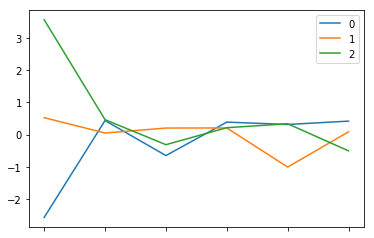

In [23]:
pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values).T.plot()

The samles can be differenciated the amount of features included in Dimension 1, *Milk*, *Grocery*, and  *Detergents_Paper*, as expected.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [25]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.5661       0.4367
1       0.5266       0.0510
2       3.5626       0.4651

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

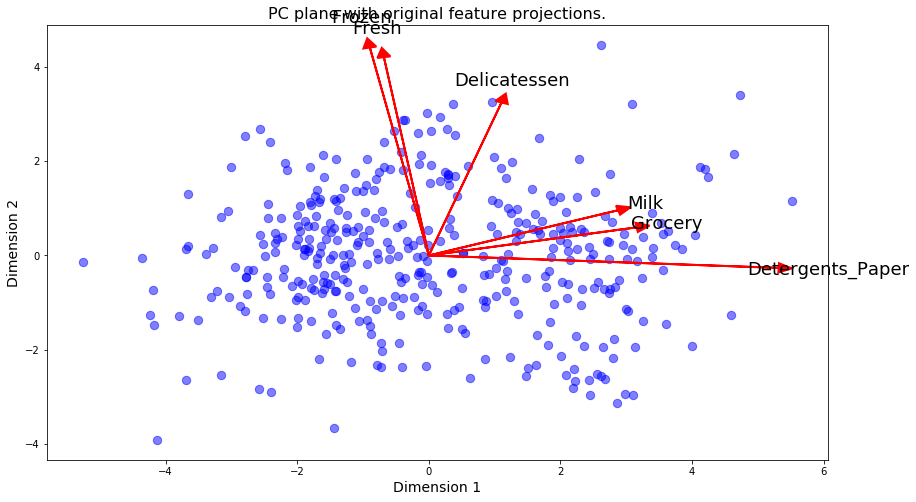

In [26]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Can be evaluated by the length of the vector. Longer the variance is large in that direction (feature).

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

| - | K-Means clustering algorithm | Gaussian Mixture Model clustering algorithm |
|--|--|--|
| Advantage | Deterministic as all the data points are labeled to a certain cluster<br>Easy to implement | Good Fit when the distribution of each cluster follows normal distribution.<br>It is the fastest algorithm for learning mixture models<br>Allow overlaps amond cluster, get probabilities to belong to the overlapped clusters for each data point<> |

* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?
 - K-Mean
 - Reason
     - We don't know the distribution follows the normal destribution.
     - From the PCA, the data points can be separated linearly.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [27]:
from sklearn.cluster import KMeans
#from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in range(2,7):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters = n_clusters, random_state = 42)
    #clusterer = GaussianMixture(n_components = n_clusters, random_state = 42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    #print(preds)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
    #centers = clusterer.means_
    #print(centers)

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    #print(sample_preds)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("number of clusters: {}, The score: {}".format(n_clusters,score))
    print(centers)
    print(sample_preds)

number of clusters: 2, The score: 0.447157742293467
[[-1.3899988   0.14110469]
 [ 2.11139058 -0.21433623]]
[0 1 1]
number of clusters: 3, The score: 0.363986479840174
[[-1.7771009  -0.59796717]
 [-0.54651961  1.45491537]
 [ 2.17038578 -0.37700312]]
[0 2 2]
number of clusters: 4, The score: 0.33115095428456565
[[ 2.42042734  0.80270825]
 [-1.93387173 -0.70354729]
 [-0.75671773  1.18118108]
 [ 1.76252085 -1.38896943]]
[1 2 0]
number of clusters: 5, The score: 0.3531934032870773
[[ 2.37230855 -1.72467132]
 [-0.80434745  1.5996843 ]
 [-2.25829191 -0.41911796]
 [ 2.40522551  0.75834366]
 [-0.0931708  -0.7290174 ]]
[2 4 3]
number of clusters: 6, The score: 0.3637123460943406
[[-0.07864281 -0.68591534]
 [ 0.20707474  2.07197914]
 [ 2.37132677 -2.05488148]
 [ 2.49642259  0.4650791 ]
 [-2.51315885 -1.01886708]
 [-1.67443409  0.76615249]]
[5 0 3]


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

As seen in the above outputs, tried from 2 to 6.
- number of clusters: 2, The score: 0.447157742293467
- number of clusters: 3, The score: 0.363986479840174
- number of clusters: 4, The score: 0.33115095428456565
- number of clusters: 5, The score: 0.3531934032870773
- number of clusters: 6, The score: 0.3637123460943406

Of these, 2 has the best silhouette score. 6 comes next.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [28]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters = 2, random_state = 42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

In [29]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [30]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9451.0  1938.0   2449.0  2200.0             307.0         771.0
Segment 1  5424.0  7780.0  11532.0  1123.0            4444.0        1136.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

- Segment 0 could represent the supermarket, supplying maily food for domestic customers. The amount of Fresh is larger.
- Segment 1 could represent the large-scale store which could sell more various items than supermarket. Large in all the categories, or restaurants. The Detergents_Paper is relatively large.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [31]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

- Saple point 0 is in Cluster 0, which is negative in Dimention 1 ==> the large-scale store, restarurants
- Sample point 1 and 2 are in cluster 1, which is positive in Dimension 1 ==> the supermarket

In the samples, both are almost irrelevant to Dimention 2.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

* Keeping fresh food seems to be most difficult to stock more than a day. Fresh food would be impacted by changing delivery service from currently 5 days a week to 3 days a week, as requiring customers to increase their stocks, which could result in loss.
* So selecting the customer segment which distriutes to the dimension that is irrelevant to *Fresh* to get a positive reaction.
* Dimension 1, 5, 6 applies to that. While Dimension 1 impacts, Dimension 5, 6 has relatively smaller explanation variance, and would impact a little.
* Dimemsion 1 is the largest as explanation variance, and clusters using Dimension 1 would help to find a good target.
* Considering the PCA, customers in positive area with regard to Dimension 1 is good, as fresh is negative, while other important features are positive.
* So targeting samples from cluster 1 is both effective and efficient, as representing the largest portion of customer segments based on monetary.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

- Wholesale distributer can use supervised learning with the customer segments.
- For the customer segments, derived cluster form the above analysis can be used.
- As the customer scales, wholesale distributer shoul evaluate the cluster with score.
- When the score decreases to a certain threshold, the customer segment should be reviewed.

The above process should be carried out repeatedly as a mangement cycle.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

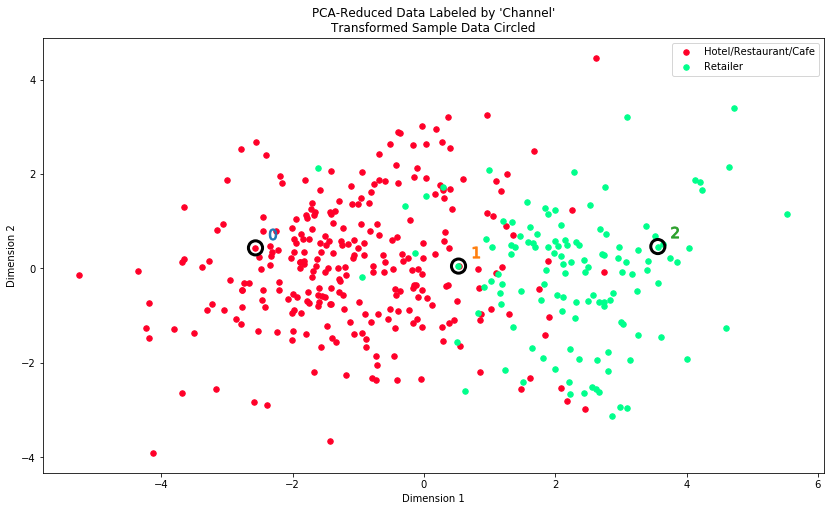

In [32]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

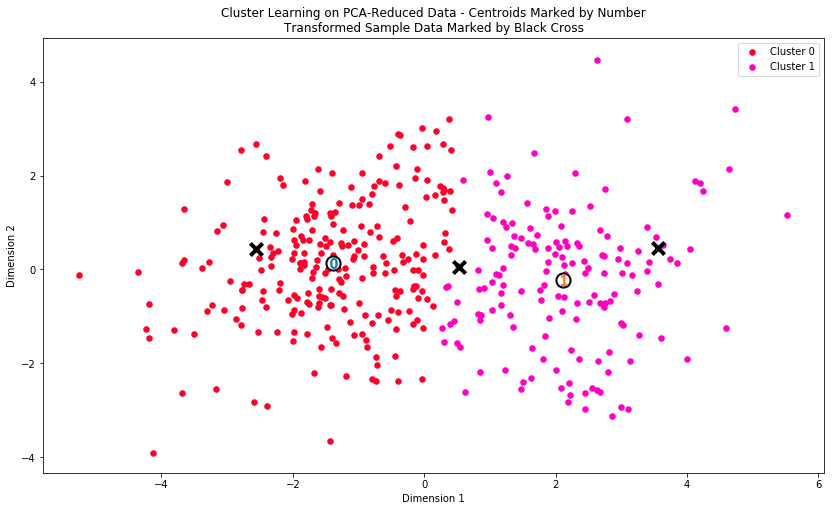

In [33]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
    - The cluster well divides the 2 customers category.
        - Most of the Ho/Re/Ca are in cluster 0
        - Most of the Retailers are in cluster 1
    - But both some Ho/Re/Ca and Retailers are categorized wrongly.
        - For these clusters only with Dimension 1 and 2 is not enough to separate the 2.
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
    - No as described above.
* Would you consider these classifications as consistent with your previous definition of the customer segments?
    - Yes, mostly.
    - Cafe and Hotel are the exception, which I didn't listed up in the definition.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.